In [2]:
def region_of_interest(img, vertices):   
    mask = np.zeros_like(img)
    match_mask_color = (255,)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def slope(start,end,width):
    x1=start[0]
    x2=end[0]
    y1=width-start[1]
    y2=width-end[1]
    if (x2-x1) != 0:
        m=(y2-y1)/(x2-x1)        
        return m
    
def findSlope(start,end,width):
    x1 = start[0]
    x2 = end[0]
    y1 = width-start[1]
    y2 = width-end[1]
    if (x2 - x1) != 0:
        m = (y2-y1)/(x2-x1)
        return m 
    
def debug(width,height,slope_left,slope_right):
    print('width:',width,', height:',height)
    print('slope_left:', slope_left)
    print('slope_right:', slope_right)
    print('slope: ', round(slope_right+slope_left,3))
    print()

C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


[[[75 35 99 74]]

 [[ 7 73 25 35]]

 [[ 1 74 21 35]]

 [[ 1 71 19 35]]

 [[ 7 71 24 35]]]


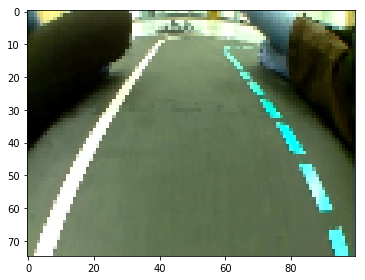

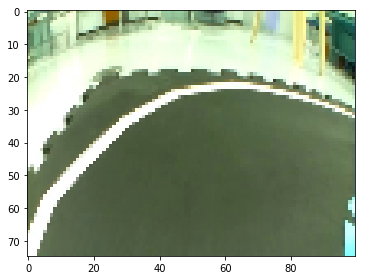

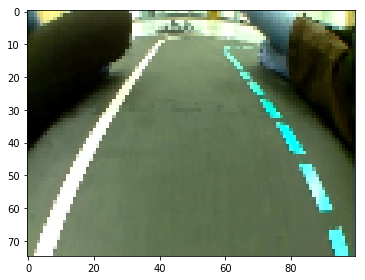

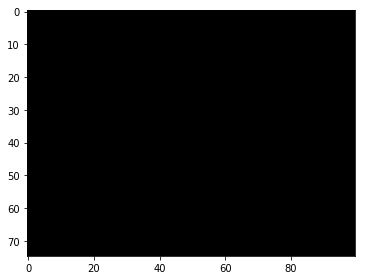

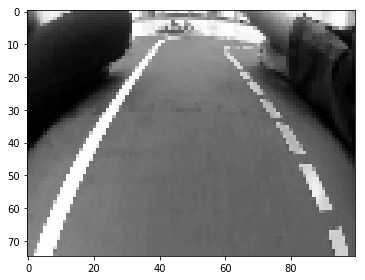

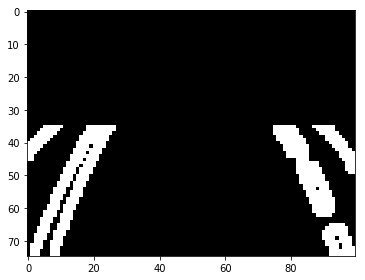

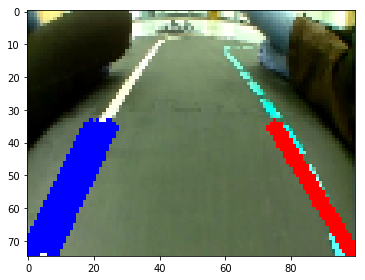

In [4]:
import cv2
import numpy as np
import time
from skimage.io import imshow,imread,imsave
from scipy import ndimage as ndi
from skimage import feature
from matplotlib import pyplot as plt
from skimage.morphology import square,dilation
#300 , 10 , 410
show=[]
image = cv2.imread('../dataset/original/10.jpg')
image1 = cv2.imread('../dataset/original/300.jpg')
countR = 0
# resize image
frame = cv2.resize(image,(100, 75))  
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
height=frame.shape[0]
width=frame.shape[1]
region_of_interest_vertices = [   
    (0, height),
    (0, (height/3)+10),
#         ((width/6), (height/3)+15),
#     (width-(width/6), (height/3)+15),
    (width, (height/3)+10),
    (width, height)]


gray=cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray,100,200)
edges = dilation(edges, square(3))
# edges[:,width-3:width] = 0 
# edges = ndi.gaussian_filter(edges,2)

crop = region_of_interest(edges,np.array([region_of_interest_vertices], np.int32))
frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
lowerR=np.array([220,70,70])
upperR=np.array([255,160,170])    
maskR = cv2.inRange(frame, lowerR, upperR)

for i in range(width):        
    if maskR[int(height/3)][i] == 255: 
        countR+=1
    if countR > 10:
        print('stop')
        break

# Hough Transform
lines = cv2.HoughLinesP(crop,rho = 1,theta = 1*np.pi/180,threshold = 40,minLineLength = 10,maxLineGap = 250)
font = cv2.FONT_HERSHEY_SIMPLEX
l=[]
r=[]

# Draw lines on the image
if(lines is not None) :
    for line in lines:  
        x1, y1, x2, y2 = line[0]
        if(findSlope((x1,y1),(x2,y2),width)):
            if(x1 < int(width/2)):
                l.append([x1,x2,y1,y2,findSlope((x1,y1),(x2,y2),width)])
                cv2.line(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
            else:
                r.append([x1,x2,y1,y2,findSlope((x1,y1),(x2,y2),width)])
                cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)

    l=np.array(l)
    r=np.array(r)
#     slope_leftP = slope_left
#     slope_rightP = slope_right
    # slope left
    if(len(l)):                
        slope_left = round(sum(l[:,4])/len(l),2)  
        x1 = round(sum(l[:,0])/len(l)).astype('int')
        x2 = round(sum(l[:,1])/len(l)).astype('int')
        y1 = round(sum(l[:,2])/len(l)).astype('int')
        y2 = round(sum(l[:,3])/len(l)).astype('int')
#         cv2.line(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
    else:
        slope_left = self.slope_leftP

    # slope right
    if(len(r)):                
        slope_right = round(sum(r[:,4])/len(r),2)
        x1 = round(sum(r[:,0])/len(r)).astype('int')
        x2 = round(sum(r[:,1])/len(r)).astype('int')
        y1 = round(sum(r[:,2])/len(r)).astype('int')
        y2 = round(sum(r[:,3])/len(r)).astype('int')
#         cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)
    else:
        slope_right = self.slope_rightP


    slope = round(slope_right + slope_left,3)
    if(slope > 2):
        slope = 2
    elif(slope < -2):
        slope = -2  

    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
#     cv2.putText(frame,str(slope),(10,20), font, 0.5,(255,255,255),1,cv2.LINE_AA)
    
show.append(cv2.resize(image,(100, 75)))
show.append(cv2.resize(image1,(100, 75)))
show.append(cv2.resize(image,(100, 75)))
show.append(maskR)
show.append(gray)
show.append(crop)
show.append(frame)
# imshow_collection(show)
num=0
for f in show:
    plt.figure()
    cv2.imwrite('../dataset/ppt/'+str(num)+'.jpg',f)
    num+=1
    imshow(f)
print(lines)
# debug(width,height,slope_left,slope_right)

In [12]:
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('laneDetection.avi',fourcc, 30, (frame.shape[1],frame.shape[0]),1)

for j in video_list:
    out.write(j)
    
out.release()

NameError: name 'video_list' is not defined

In [32]:
import cv2
import numpy as np
from scipy import ndimage as ndi
from skimage.morphology import square,dilation
from skimage.io import imshow
import time
class HoughTransform:
    
    def __init__(self,filename = 'test.h264',threshold = 40):
        self.url = '../../video/' + filename
        self.cap = cv2.VideoCapture(self.url)
        self.countR = 0
        self.left = []
        self.right = []
        self.ret = 0
        self.frame = 0
        self.slope_right = 0
        self.slope_left = 0
        self.slope = 0
        self.slope_rightP = 0
        self.slope_leftP = 0
        self.font = cv2.FONT_HERSHEY_SIMPLEX
        self.threshold = threshold
        self.count = 0
        
    def _debug(self,debug = True):
        if (debug):            
#             cv2.putText(self.frame,str(self.slope_right),(100,25), self.font, 0.5,(255,255,255),2,cv2.LINE_AA)
            
            print('count :', self.count)
            print('slope_rightP :',self.slope_rightP)
            print('slope_leftP :',self.slope_leftP)
            print('slope_right :', self.slope_right)            
            print('slope_left :', self.slope_left)            
            print('slope :', self.slope)
            print()

    
    def region_of_interest(self,img, vertices):
        mask = np.zeros_like(img)
        match_mask_color = (255,)
        cv2.fillPoly(mask, vertices, 255)
        masked_image = cv2.bitwise_and(img, mask)
        return masked_image

    def findSlope(self,start,end,width):
        x1 = start[0]
        x2 = end[0]
        y1 = width-start[1]
        y2 = width-end[1]
        if (x2 - x1) != 0:
            m = (y2-y1)/(x2-x1)
            return m 
        
    def run(self,image=0,fromvideo = False,debugs = False):
        if(fromvideo):
            while self.cap.isOpened():
                self.ret, self.frame = self.cap.read()
                if not self.ret:
                    print("Can't receive frame (stream end?). Exiting ...")
                    break                
                if cv2.waitKey(1) == ord('q'):
                    break
                self.corerun()                    
                self._debug(debug = debugs)
            self.cap.release()
            cv2.destroyAllWindows()
        else:
            self.frame = image
            while cv2.waitKey(1) != ord('q'):                
                self.corerun()  
                self._debug(debug = debugs)
                return float(self.slope)
            self.cap.release()
            cv2.destroyAllWindows()
        
    def corerun(self):         
        self.frame = cv2.resize(self.frame,(100, 75))    
        height=self.frame.shape[0]
        width=self.frame.shape[1]
        region_of_interest_vertices = [   
            (0, height),
            (0, (height/3)+10),
            (width, (height/3)+10),
            (width, height)]
        
        gray=cv2.cvtColor(self.frame, cv2.COLOR_RGB2GRAY)

        edges = cv2.Canny(gray,100,200)
        edges = dilation(edges, square(3))
        # edges[:,width-3:width] = 0 
        # edges = ndi.gaussian_filter(edges,2)
        
        crop = self.region_of_interest(edges,np.array([region_of_interest_vertices], np.int32))
        self.frame=cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)    
        lowerR=np.array([220,70,70])
        upperR=np.array([255,160,170])    
        maskR = cv2.inRange(self.frame, lowerR, upperR)
        
        for i in range(width):        
            if maskR[int(height/3)][i] == 255: 
                self.countR+=1
            if self.countR > 10:
                print('stop')
                break

        # Hough Transform
        lines = cv2.HoughLinesP(crop,rho = 1,theta = 1*np.pi/180,threshold = self.threshold,minLineLength = 10,maxLineGap = 250)
        font = cv2.FONT_HERSHEY_SIMPLEX
        l=[]
        r=[]

        # Draw lines on the image
        if(lines is not None) :
            for line in lines:  
                x1, y1, x2, y2 = line[0]
                if(self.findSlope((x1,y1),(x2,y2),width)):
                    if(x1 < int(width/2)):
                        l.append([x1,x2,y1,y2,self.findSlope((x1,y1),(x2,y2),width)])
                    else:
                        r.append([x1,x2,y1,y2,self.findSlope((x1,y1),(x2,y2),width)])

            l=np.array(l)
            r=np.array(r)
            self.slope_leftP = self.slope_left
            self.slope_rightP = self.slope_right
            # slope left
            if(len(l)):                
                self.slope_left = round(sum(l[:,4])/len(l),2)  
                x1 = round(sum(l[:,0])/len(l)).astype('int')
                x2 = round(sum(l[:,1])/len(l)).astype('int')
                y1 = round(sum(l[:,2])/len(l)).astype('int')
                y2 = round(sum(l[:,3])/len(l)).astype('int')
                cv2.line(self.frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
            else:
                self.slope_left = self.slope_leftP

            # slope right
            if(len(r)):                
                self.slope_right = round(sum(r[:,4])/len(r),2)
                x1 = round(sum(r[:,0])/len(r)).astype('int')
                x2 = round(sum(r[:,1])/len(r)).astype('int')
                y1 = round(sum(r[:,2])/len(r)).astype('int')
                y2 = round(sum(r[:,3])/len(r)).astype('int')
                cv2.line(self.frame, (x1, y1), (x2, y2), (0, 0, 255), 3)
            else:
                self.slope_right = self.slope_rightP
            
            
        self.slope = round(self.slope_right + self.slope_left,3)
        if(self.slope > 2):
            self.slope = 2
        elif(self.slope < -2):
            self.slope = -2  
            
        self.frame=cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)  
        cv2.putText(self.frame,str(self.count),(10,20), self.font, 0.5,(255,255,255),2,cv2.LINE_AA)
        self.count += 1
#         time.sleep(0.05)
        cv2.imshow('frame', self.frame)
        
        
        

In [33]:
image = cv2.imread('../dataset/original/300.jpg')
h = HoughTransform(threshold=10)
h.run(image,fromvideo=True,debugs=True)

count : 1
slope_rightP : 0
slope_leftP : 0
slope_right : -2.01
slope_left : 2.81
slope : 0.8

count : 2
slope_rightP : -2.01
slope_leftP : 2.81
slope_right : -2.41
slope_left : 2.36
slope : -0.05

count : 3
slope_rightP : -2.41
slope_leftP : 2.36
slope_right : -2.03
slope_left : 2.07
slope : 0.04

count : 4
slope_rightP : -2.03
slope_leftP : 2.07
slope_right : -1.81
slope_left : 2.16
slope : 0.35

count : 5
slope_rightP : -1.81
slope_leftP : 2.16
slope_right : -1.74
slope_left : 2.24
slope : 0.5

count : 6
slope_rightP : -1.74
slope_leftP : 2.24
slope_right : -2.38
slope_left : 0.3
slope : -2

count : 7
slope_rightP : -2.38
slope_leftP : 0.3
slope_right : -1.78
slope_left : 2.35
slope : 0.57

count : 8
slope_rightP : -1.78
slope_leftP : 2.35
slope_right : -1.79
slope_left : 2.21
slope : 0.42

count : 9
slope_rightP : -1.79
slope_leftP : 2.21
slope_right : -2.04
slope_left : 1.83
slope : -0.21

count : 10
slope_rightP : -2.04
slope_leftP : 1.83
slope_right : -2.04
slope_left : 1.88
slop

count : 89
slope_rightP : -3.52
slope_leftP : 2.21
slope_right : -1.81
slope_left : 2.38
slope : 0.57

count : 90
slope_rightP : -1.81
slope_leftP : 2.38
slope_right : -1.84
slope_left : 2.29
slope : 0.45

count : 91
slope_rightP : -1.84
slope_leftP : 2.29
slope_right : -1.46
slope_left : 2.82
slope : 1.36

count : 92
slope_rightP : -1.46
slope_leftP : 2.82
slope_right : -2.02
slope_left : 2.1
slope : 0.08

count : 93
slope_rightP : -2.02
slope_leftP : 2.1
slope_right : -1.35
slope_left : 2.58
slope : 1.23

count : 94
slope_rightP : -1.35
slope_leftP : 2.58
slope_right : -1.29
slope_left : 1.54
slope : 0.25

count : 95
slope_rightP : -1.29
slope_leftP : 1.54
slope_right : -2.07
slope_left : 1.75
slope : -0.32

count : 96
slope_rightP : -2.07
slope_leftP : 1.75
slope_right : -3.07
slope_left : 2.07
slope : -1.0

count : 97
slope_rightP : -3.07
slope_leftP : 2.07
slope_right : -2.23
slope_left : 3.49
slope : 1.26

count : 98
slope_rightP : -2.23
slope_leftP : 3.49
slope_right : -2.22
slo

count : 181
slope_rightP : -9.27
slope_leftP : 1.21
slope_right : -16.75
slope_left : 1.06
slope : -2

count : 182
slope_rightP : -16.75
slope_leftP : 1.06
slope_right : -5.59
slope_left : 0.91
slope : -2

count : 183
slope_rightP : -5.59
slope_leftP : 0.91
slope_right : -4.78
slope_left : 0.93
slope : -2

count : 184
slope_rightP : -4.78
slope_leftP : 0.93
slope_right : -4.8
slope_left : 1.07
slope : -2

count : 185
slope_rightP : -4.8
slope_leftP : 1.07
slope_right : -3.92
slope_left : 0.97
slope : -2

count : 186
slope_rightP : -3.92
slope_leftP : 0.97
slope_right : -6.36
slope_left : 1.03
slope : -2

count : 187
slope_rightP : -6.36
slope_leftP : 1.03
slope_right : -4.29
slope_left : 1.31
slope : -2

count : 188
slope_rightP : -4.29
slope_leftP : 1.31
slope_right : -4.44
slope_left : 1.62
slope : -2

count : 189
slope_rightP : -4.44
slope_leftP : 1.62
slope_right : -7.71
slope_left : 1.2
slope : -2

count : 190
slope_rightP : -7.71
slope_leftP : 1.2
slope_right : -3.48
slope_left :

count : 271
slope_rightP : -2.11
slope_leftP : 3.05
slope_right : -1.96
slope_left : 1.84
slope : -0.12

count : 272
slope_rightP : -1.96
slope_leftP : 1.84
slope_right : -2.02
slope_left : 2.34
slope : 0.32

count : 273
slope_rightP : -2.02
slope_leftP : 2.34
slope_right : -2.69
slope_left : 2.51
slope : -0.18

count : 274
slope_rightP : -2.69
slope_leftP : 2.51
slope_right : -1.94
slope_left : 8.45
slope : 2

count : 275
slope_rightP : -1.94
slope_leftP : 8.45
slope_right : -1.89
slope_left : 4.25
slope : 2

count : 276
slope_rightP : -1.89
slope_leftP : 4.25
slope_right : -1.74
slope_left : 5.0
slope : 2

count : 277
slope_rightP : -1.74
slope_leftP : 5.0
slope_right : -1.83
slope_left : 2.82
slope : 0.99

count : 278
slope_rightP : -1.83
slope_leftP : 2.82
slope_right : -2.05
slope_left : 1.24
slope : -0.81

count : 279
slope_rightP : -2.05
slope_leftP : 1.24
slope_right : -3.09
slope_left : 1.92
slope : -1.17

count : 280
slope_rightP : -3.09
slope_leftP : 1.92
slope_right : -3.01

slope_leftP : 1.2
slope_right : -2.32
slope_left : 1.95
slope : -0.37

count : 355
slope_rightP : -2.32
slope_leftP : 1.95
slope_right : -2.42
slope_left : 2.18
slope : -0.24

count : 356
slope_rightP : -2.42
slope_leftP : 2.18
slope_right : -2.19
slope_left : 1.87
slope : -0.32

count : 357
slope_rightP : -2.19
slope_leftP : 1.87
slope_right : -2.13
slope_left : 1.9
slope : -0.23

count : 358
slope_rightP : -2.13
slope_leftP : 1.9
slope_right : -2.63
slope_left : 2.2
slope : -0.43

count : 359
slope_rightP : -2.63
slope_leftP : 2.2
slope_right : -3.66
slope_left : 2.16
slope : -1.5

count : 360
slope_rightP : -3.66
slope_leftP : 2.16
slope_right : -2.22
slope_left : 2.71
slope : 0.49

count : 361
slope_rightP : -2.22
slope_leftP : 2.71
slope_right : -1.86
slope_left : 2.3
slope : 0.44

count : 362
slope_rightP : -1.86
slope_leftP : 2.3
slope_right : -2.02
slope_left : 1.57
slope : -0.45

count : 363
slope_rightP : -2.02
slope_leftP : 1.57
slope_right : -1.75
slope_left : 2.32
slope : 

count : 442
slope_rightP : -2.53
slope_leftP : 0.76
slope_right : -2.53
slope_left : 0.35
slope : -2

stop
count : 443
slope_rightP : -2.53
slope_leftP : 0.35
slope_right : 0.24
slope_left : 0.33
slope : 0.57

stop
count : 444
slope_rightP : 0.24
slope_leftP : 0.33
slope_right : 0.24
slope_left : -0.49
slope : -0.25

stop
count : 445
slope_rightP : 0.24
slope_leftP : -0.49
slope_right : 0.24
slope_left : 0.04
slope : 0.28

stop
count : 446
slope_rightP : 0.24
slope_leftP : 0.04
slope_right : 0.24
slope_left : 0.25
slope : 0.49

stop
count : 447
slope_rightP : 0.24
slope_leftP : 0.25
slope_right : 0.24
slope_left : 0.73
slope : 0.97

stop
count : 448
slope_rightP : 0.24
slope_leftP : 0.73
slope_right : 0.2
slope_left : -0.36
slope : -0.16

stop
count : 449
slope_rightP : 0.2
slope_leftP : -0.36
slope_right : 0.2
slope_left : 0.08
slope : 0.28

stop
count : 450
slope_rightP : 0.2
slope_leftP : 0.08
slope_right : 0.2
slope_left : 0.58
slope : 0.78

stop
count : 451
slope_rightP : 0.2
slop

stop
count : 525
slope_rightP : -0.4
slope_leftP : 1.01
slope_right : -2.68
slope_left : 3.39
slope : 0.71

stop
count : 526
slope_rightP : -2.68
slope_leftP : 3.39
slope_right : -1.7
slope_left : 1.03
slope : -0.67

stop
count : 527
slope_rightP : -1.7
slope_leftP : 1.03
slope_right : -1.7
slope_left : -0.4
slope : -2

stop
count : 528
slope_rightP : -1.7
slope_leftP : -0.4
slope_right : -1.45
slope_left : 2.06
slope : 0.61

stop
count : 529
slope_rightP : -1.45
slope_leftP : 2.06
slope_right : -3.54
slope_left : 1.6
slope : -1.94

stop
count : 530
slope_rightP : -3.54
slope_leftP : 1.6
slope_right : -2.25
slope_left : -0.44
slope : -2

stop
count : 531
slope_rightP : -2.25
slope_leftP : -0.44
slope_right : -0.54
slope_left : 0.69
slope : 0.15

stop
count : 532
slope_rightP : -0.54
slope_leftP : 0.69
slope_right : -0.54
slope_left : 1.21
slope : 0.67

stop
count : 533
slope_rightP : -0.54
slope_leftP : 1.21
slope_right : -1.89
slope_left : 0.49
slope : -1.4

stop
count : 534
slope_rig

In [38]:
a=[2,3,4,5]

In [39]:
from scipy import stats
b = stats.mode(a)

In [41]:
print(b.mode[0])

2


In [80]:
import cv2
import numpy as np
from scipy import ndimage as ndi
from skimage.morphology import square,dilation
from skimage.io import imshow
from scipy import stats
import time
class HoughTransform:
    
    def __init__(self,filename = 'test.h264',threshold = 40):
        self.url = '../../video/' + filename
        self.cap = cv2.VideoCapture(self.url)
        self.countR = 0
        self.left = []
        self.right = []
        self.ret = 0
        self.frame = 0
        self.slope_right = 0
        self.slope_left = 0
        self.slope = 0
        self.slope_rightP = 0
        self.slope_leftP = 0
        self.font = cv2.FONT_HERSHEY_SIMPLEX
        self.threshold = threshold
        self.red = False
        
    def _debug(self,debug = True):
        if (debug):            
#             cv2.putText(self.frame,str(self.slope_right),(100,25), self.font, 0.5,(255,255,255),2,cv2.LINE_AA)
            
            
            print('slope_rightP :',self.slope_rightP)
            print('slope_leftP :',self.slope_leftP)
            print('slope_right :', self.slope_right)            
            print('slope_left :', self.slope_left)            
            print('slope :', self.slope)
            print()

    
    def region_of_interest(self,img, vertices):
        mask = np.zeros_like(img)
        match_mask_color = (255,)
        cv2.fillPoly(mask, vertices, 255)
        masked_image = cv2.bitwise_and(img, mask)
        return masked_image

    def findSlope(self,start,end,width):
        x1 = start[0]
        x2 = end[0]
        y1 = width-start[1]
        y2 = width-end[1]
        if (x2 - x1) != 0:
            m = (y2-y1)/(x2-x1)
            return m 
        
    def run(self,image=0,fromvideo = False,debugs = False):
        if(fromvideo):
            while self.cap.isOpened():
                self.ret, self.frame = self.cap.read()
                if not self.ret:
                    print("Can't receive frame (stream end?). Exiting ...")
                    break                
                if cv2.waitKey(1) == ord('q'):
                    break
                if self.red:
                    break
                self.corerun()                    
                self._debug(debug = debugs)
            self.cap.release()
            cv2.destroyAllWindows()
        else:
            self.frame = image
            while cv2.waitKey(1) != ord('q'):                
                self.corerun()  
                self._debug(debug = debugs)
                if self.red:
                    return 3
                else:
                    return float(self.slope)
            self.cap.release()
            cv2.destroyAllWindows()
            
        
    def corerun(self):         
        self.frame = cv2.resize(self.frame,(100, 75))    
        height=self.frame.shape[0]
        width=self.frame.shape[1]
        region_of_interest_vertices = [   
            (0, height),
            (0, (height/3)+10),
            (width, (height/3)+10),
            (width, height)]
        
        gray=cv2.cvtColor(self.frame, cv2.COLOR_RGB2GRAY)

        edges = cv2.Canny(gray,100,200)
        edges = dilation(edges, square(3))
        # edges[:,width-3:width] = 0 
        # edges = ndi.gaussian_filter(edges,2)
        
        crop = self.region_of_interest(edges,np.array([region_of_interest_vertices], np.int32))
        self.frame=cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)    
        lowerR=np.array([220,70,70])
        upperR=np.array([255,160,170])    
        maskR = cv2.inRange(self.frame, lowerR, upperR)
        
        for i in range(width):        
            if maskR[int(height/3)][i] == 255: 
                self.countR+=1
            if self.countR > 10:
                self.red = True
                return

        # Hough Transform
        lines = cv2.HoughLinesP(crop,rho = 1,theta = 1*np.pi/180,threshold = self.threshold,minLineLength = 10,maxLineGap = 250)
        font = cv2.FONT_HERSHEY_SIMPLEX
        l=[]
        r=[]

        # Draw lines on the image
        if(lines is not None) :
            for line in lines:  
                x1, y1, x2, y2 = line[0]
                if(self.findSlope((x1,y1),(x2,y2),width)):
                    if(x1 < int(width/2)):
                        l.append([x1,x2,y1,y2,])
                    else:
                        r.append([x1,x2,y1,y2,self.findSlope((x1,y1),(x2,y2),width)])

            l=np.array(l)
            r=np.array(r)
            self.slope_leftP = self.slope_left
            self.slope_rightP = self.slope_right
            # slope left
            if(len(l)):                
                modeL = stats.mode(l).mode[0].astype(int)
                self.slope_left = round(self.findSlope((modeL[0],modeL[2]),(modeL[1],modeL[3]),width),3)
                cv2.line(self.frame, (modeL[0], modeL[2]), (modeL[1], modeL[3]), (255, 0, 0), 3)
                print('modeL', modeL)
            else:
                self.slope_left = self.slope_leftP

            # slope right
            if(len(r)):                
                modeR = stats.mode(r).mode[0].astype(int)
                self.slope_right = round(self.findSlope((modeR[0],modeR[2]),(modeR[1],modeR[3]),width),3)
                cv2.line(self.frame, (modeR[0], modeR[2]), (modeR[1], modeR[3]), (0, 0, 255), 3)
                print('modeR', modeR)
            else:
                self.slope_right = self.slope_rightP
        print('allLeft: ',l)  
        print('allRight: ',r)
        
        print('lefy: ',self.slope_left, 'right:',self.slope_right)   
        self.slope = round(self.slope_right + self.slope_left,3)
        if(self.slope > 2):
            self.slope = 2
        elif(self.slope < -2):
            self.slope = -2  
            
#         self.frame=cv2.cvtColor(self.frame, cv2.COLOR_BGR2RGB)  
        cv2.putText(self.frame,str(self.slope),(10,20), self.font, 0.5,(255,255,255),2,cv2.LINE_AA)
        
#         time.sleep(0.05)
        cv2.imshow('frame', self.frame)
        
        
        

In [81]:
a = []
for i in range(3,30):
    image = cv2.imread('../dataset/original/'+ str(i) +'.jpg') 
    a.append(image)
             
h = HoughTransform(threshold=40)
for i in a:
    h.run(i,fromvideo=True,debugs=True)

modeL [ 1 19 74 35]
modeR [77 97 35 73 -2]
allLeft:  [[ 1 19 73 35]
 [ 6 23 74 35]
 [ 2 20 74 35]
 [ 8 24 74 35]]
allRight:  [[77.   97.   35.   74.   -1.95]
 [79.   98.   35.   73.   -2.  ]]
lefy:  2.167 right: -1.9
slope_rightP : 0
slope_leftP : 0
slope_right : -1.9
slope_left : 2.167
slope : 0.267

modeL [ 1 20 74 35]
modeR [76 97 35 74 -1]
allLeft:  [[ 1 20 74 35]
 [ 7 23 73 35]
 [ 8 24 74 35]]
allRight:  [[79.         99.         35.         74.         -1.95      ]
 [76.         97.         35.         74.         -1.85714286]]
lefy:  2.053 right: -1.857
slope_rightP : -1.9
slope_leftP : 2.167
slope_right : -1.857
slope_left : 2.053
slope : 0.196

modeL [ 1 19 71 35]
modeR [75 99 35 73 -1]
allLeft:  [[ 1 20 73 35]
 [ 1 19 71 36]
 [ 7 23 74 35]
 [ 8 24 73 35]
 [ 7 22 71 35]]
allRight:  [[75.         99.         36.         74.         -1.58333333]
 [78.         99.         35.         73.         -1.80952381]]
lefy:  2.0 right: -1.583
slope_rightP : -1.857
slope_leftP : 2.053
slop

modeL [ 0 20 74 35]
modeR [75 99 35 72 -1]
allLeft:  [[ 7 25 72 35]
 [ 1 21 74 35]
 [ 0 20 74 35]]
allRight:  [[75.         99.         36.         74.         -1.58333333]
 [78.         99.         35.         72.         -1.76190476]]
lefy:  1.95 right: -1.542
slope_rightP : -2.294
slope_leftP : 2.167
slope_right : -1.542
slope_left : 1.95
slope : 0.408

modeL [ 7 19 74 35]
modeR [75 99 35 72 -1]
allLeft:  [[ 0 22 74 35]
 [ 7 24 74 35]
 [ 1 19 70 35]
 [ 7 23 72 35]]
allRight:  [[75.         99.         35.         74.         -1.625     ]
 [77.         99.         35.         72.         -1.68181818]]
lefy:  3.25 right: -1.542
slope_rightP : -1.542
slope_leftP : 1.95
slope_right : -1.542
slope_left : 3.25
slope : 1.708

modeL [ 0 19 74 35]
modeR [77 99 35 73 -1]
allLeft:  [[ 8 24 74 35]
 [ 7 22 74 35]
 [ 1 19 70 35]
 [ 0 20 74 35]]
allRight:  [[78.         99.         35.         73.         -1.80952381]
 [77.         99.         35.         74.         -1.77272727]]
lefy:  2.053 rig

modeL [ 5 17 70 35]
modeR [73 98 35 74 -2]
allLeft:  [[ 5 22 74 35]
 [ 0 17 72 35]
 [ 5 20 70 35]]
allRight:  [[77.     93.     35.     74.     -2.4375]
 [78.     98.     35.     72.     -1.85  ]
 [73.     98.     35.     74.     -1.56  ]]
lefy:  2.917 right: -1.56
slope_rightP : -2.053
slope_leftP : 2.235
slope_right : -1.56
slope_left : 2.917
slope : 1.357

modeL [ 0 16 74 35]
modeR [73 97 35 73 -1]
allLeft:  [[ 0 18 71 35]
 [ 5 20 74 35]
 [ 6 21 74 35]
 [ 0 16 69 35]]
allRight:  [[74.         98.         35.         73.         -1.58333333]
 [73.         97.         36.         74.         -1.58333333]]
lefy:  2.438 right: -1.583
slope_rightP : -1.56
slope_leftP : 2.917
slope_right : -1.583
slope_left : 2.438
slope : 0.855

modeL [ 0 15 72 35]
modeR [72 93 35 74 -1]
allLeft:  [[ 4 21 73 35]
 [ 0 15 72 35]]
allRight:  [[73.         97.         35.         74.         -1.625     ]
 [76.         98.         35.         74.         -1.77272727]
 [72.         93.         35.         74. 

modeL [ 0 17 74 35]
modeR [73 96 35 73 -1]
allLeft:  [[ 6 20 74 35]
 [ 0 17 74 35]
 [ 0 97 39 36]]
allRight:  [[75.         98.         35.         73.         -1.65217391]
 [73.         96.         35.         74.         -1.69565217]]
lefy:  2.294 right: -1.652
slope_rightP : -1.48
slope_leftP : 2.167
slope_right : -1.652
slope_left : 2.294
slope : 0.642

modeL [ 0 17 35 35]
modeR [73 97 35 74 -1]
allLeft:  [[ 6 20 74 35]
 [ 0 19 73 35]
 [ 0 17 71 35]
 [ 2 96 35 36]]
allRight:  [[78.    98.    35.    74.    -1.95 ]
 [73.    97.    35.    74.    -1.625]]
lefy:  0.0 right: -1.625
slope_rightP : -1.652
slope_leftP : 2.294
slope_right : -1.625
slope_left : 0.0
slope : -1.625

modeL [ 0 18 74 35]
modeR [77 93 35 74 -2]
allLeft:  [[ 1 97 36 37]
 [ 0 18 70 35]
 [ 5 22 74 35]
 [ 0 19 74 35]]
allRight:  [[77.         93.         35.         74.         -2.4375    ]
 [79.         97.         35.         74.         -2.16666667]]
lefy:  2.167 right: -2.438
slope_rightP : -1.625
slope_leftP : 0.

modeL [ 3 16 74 35]
modeR [76 93 35 74 -2]
allLeft:  [[ 4 18 74 35]
 [ 3 16 74 35]]
allRight:  [[77.         97.         35.         74.         -1.95      ]
 [76.         93.         35.         74.         -2.29411765]]
lefy:  3.0 right: -2.294
slope_rightP : -2.294
slope_leftP : 2.6
slope_right : -2.294
slope_left : 3.0
slope : 0.706

modeL [ 3 14 74 35]
modeR [72 92 35 74 -1]
allLeft:  [[ 3 14 74 35]]
allRight:  [[73.         92.         35.         72.         -1.94736842]
 [79.         97.         35.         74.         -2.16666667]
 [76.         96.         35.         74.         -1.95      ]
 [72.         92.         35.         74.         -1.95      ]]
lefy:  3.545 right: -1.95
slope_rightP : -2.294
slope_leftP : 3.0
slope_right : -1.95
slope_left : 3.545
slope : 1.595

modeL [ 3 15 74 35]
modeR [72 97 35 73 -1]
allLeft:  [[ 3 15 74 35]]
allRight:  [[72.         93.         35.         74.         -1.85714286]
 [75.         97.         35.         74.         -1.77272727]
 

slope_leftP : 3.545
slope_right : -2.053
slope_left : 2.786
slope : 0.733

modeL [ 0 19 73 35]
modeR [79 95 35 74 -2]
allLeft:  [[ 0 19 73 35]]
allRight:  [[79.     95.     35.     74.     -2.4375]]
lefy:  2.0 right: -2.438
slope_rightP : -2.053
slope_leftP : 2.786
slope_right : -2.438
slope_left : 2.0
slope : -0.438

modeL [ 1 15 74 35]
allLeft:  [[ 3 18 74 35]
 [ 1 15 72 35]
 [ 1 17 74 35]]
allRight:  []
lefy:  2.786 right: -2.438
slope_rightP : -2.438
slope_leftP : 2.0
slope_right : -2.438
slope_left : 2.786
slope : 0.348

modeL [ 1 15 74 35]
allLeft:  [[ 3 16 74 35]
 [ 1 15 74 35]]
allRight:  []
lefy:  2.786 right: -2.438
slope_rightP : -2.438
slope_leftP : 2.786
slope_right : -2.438
slope_left : 2.786
slope : 0.348

modeL [ 1 19 69 35]
allLeft:  [[ 1 21 73 35]
 [ 2 19 69 35]]
allRight:  []
lefy:  1.889 right: -2.438
slope_rightP : -2.438
slope_leftP : 2.786
slope_right : -2.438
slope_left : 1.889
slope : -0.549

modeL [ 1 17 74 35]
allLeft:  [[ 1 19 74 35]
 [ 2 20 74 35]
 [ 1 17 7

modeL [ 0 21 58 35]
allLeft:  [[ 0 31 66 35]
 [ 0 29 64 35]
 [ 0 41 58 35]
 [ 0 21 59 38]
 [ 0 25 67 42]]
allRight:  []
lefy:  1.095 right: -4.375
slope_rightP : -4.375
slope_leftP : 0.679
slope_right : -4.375
slope_left : 1.095
slope : -2

modeL [ 0 19 56 35]
allLeft:  [[ 0 32 67 35]
 [ 1 34 68 35]
 [ 1 29 63 35]
 [ 0 19 59 40]
 [10 31 56 35]]
allRight:  []
lefy:  1.105 right: -4.375
slope_rightP : -4.375
slope_leftP : 1.095
slope_right : -4.375
slope_left : 1.105
slope : -2

modeL [ 0 29 55 35]
allLeft:  [[ 0 32 67 35]
 [ 0 35 70 35]
 [ 2 29 62 35]
 [ 0 34 68 35]
 [11 31 55 35]]
allRight:  []
lefy:  0.69 right: -4.375
slope_rightP : -4.375
slope_leftP : 1.105
slope_right : -4.375
slope_left : 0.69
slope : -2

modeL [ 0 26 63 35]
allLeft:  [[ 0 35 70 35]
 [ 0 32 67 35]
 [ 0 26 63 37]
 [ 0 27 68 41]]
allRight:  []
lefy:  1.077 right: -4.375
slope_rightP : -4.375
slope_leftP : 0.69
slope_right : -4.375
slope_left : 1.077
slope : -2

modeL [ 0 24 64 35]
allLeft:  [[ 0 35 70 35]
 [ 0 42 6

slope_leftP : 1.393
slope_right : -3.889
slope_left : 1.5
slope : -2

modeL [ 0 21 74 35]
modeR [86 95 35 71 -4]
allLeft:  [[ 6 31 74 35]
 [ 1 35 69 35]
 [ 1 25 74 35]
 [ 0 21 56 35]
 [ 8 32 74 35]
 [ 0 24 72 36]]
allRight:  [[86.         95.         35.         71.         -4.        ]
 [88.         99.         35.         71.         -3.27272727]]
lefy:  1.857 right: -4.0
slope_rightP : -3.889
slope_leftP : 1.5
slope_right : -4.0
slope_left : 1.857
slope : -2

modeL [ 7 31 74 35]
modeR [84 95 35 72 -3]
allLeft:  [[ 3 34 66 35]
 [ 7 31 59 35]
 [ 6 29 73 35]
 [ 7 31 74 36]
 [ 1 25 74 35]]
allRight:  [[84.         95.         35.         72.         -3.36363636]
 [86.         99.         35.         72.         -2.84615385]]
lefy:  1.625 right: -3.364
slope_rightP : -4.0
slope_leftP : 1.857
slope_right : -3.364
slope_left : 1.625
slope : -1.739

modeL [ 6 33 74 35]
modeR [84 94 35 73 -4]
allLeft:  [[ 2 33 68 37]
 [ 6 32 61 35]
 [ 1 25 74 35]
 [ 7 33 74 35]
 [ 6 29 74 35]]
allRight:  [[8

modeL [ 0 18 72 35]
modeR [75 97 35 74 -1]
allLeft:  [[ 5 24 72 35]
 [ 0 20 72 35]
 [ 5 26 74 35]
 [ 0 18 70 35]]
allRight:  [[77.         98.         35.         74.         -1.85714286]
 [75.         97.         35.         74.         -1.77272727]]
lefy:  2.056 right: -1.773
slope_rightP : -1.762
slope_leftP : 1.857
slope_right : -1.773
slope_left : 2.056
slope : 0.283

modeL [ 0 18 74 35]
modeR [76 97 35 73 -2]
allLeft:  [[ 5 25 74 35]
 [ 0 20 74 35]
 [ 6 22 67 35]
 [ 0 18 70 35]]
allRight:  [[80.         98.         35.         73.         -2.11111111]
 [76.         97.         35.         74.         -1.85714286]]
lefy:  2.167 right: -1.81
slope_rightP : -1.773
slope_leftP : 2.056
slope_right : -1.81
slope_left : 2.167
slope : 0.357

modeL [ 5 19 72 35]
modeR [75 96 35 72 -1]
allLeft:  [[ 0 19 72 35]
 [ 5 24 72 35]
 [ 5 23 74 37]]
allRight:  [[75.         96.         35.         74.         -1.85714286]
 [78.         97.         35.         72.         -1.94736842]]
lefy:  2.643 

modeL [ 0 17 69 35]
modeR [73 93 35 74 -1]
allLeft:  [[ 4 20 74 35]
 [ 0 18 71 35]
 [ 0 17 69 35]]
allRight:  [[77.         97.         35.         74.         -1.95      ]
 [73.         93.         35.         74.         -1.95      ]
 [76.         94.         35.         74.         -2.16666667]
 [79.         95.         36.         67.         -1.9375    ]]
lefy:  2.0 right: -1.95
slope_rightP : -1.95
slope_leftP : 3.0
slope_right : -1.95
slope_left : 2.0
slope : 0.05

modeL [ 4 15 72 35]
modeR [77 91 35 74 -2]
allLeft:  [[ 6 15 74 36]
 [ 4 23 72 35]]
allRight:  [[78.         92.         35.         74.         -2.78571429]
 [77.         91.         35.         74.         -2.78571429]]
lefy:  3.364 right: -2.786
slope_rightP : -1.95
slope_leftP : 2.0
slope_right : -2.786
slope_left : 3.364
slope : 0.578

modeL [ 1 15 70 35]
modeR [76 92 35 74 -2]
allLeft:  [[ 4 21 74 35]
 [ 3 18 72 35]
 [ 1 15 70 35]]
allRight:  [[75.         92.         35.         74.         -2.29411765]
 [76.  

modeR [75 94 35 73 -2]
allLeft:  [[ 4 19 74 35]
 [ 0 17 70 35]
 [ 5 20 74 35]]
allRight:  [[78.         97.         35.         73.         -2.        ]
 [75.         94.         35.         74.         -2.05263158]]
lefy:  2.294 right: -2.0
slope_rightP : -2.176
slope_leftP : 2.125
slope_right : -2.0
slope_left : 2.294
slope : 0.294

modeL [ 0 16 68 35]
modeR [75 93 35 70 -2]
allLeft:  [[ 3 20 74 35]
 [ 0 16 68 35]]
allRight:  [[75.         97.         35.         70.         -1.59090909]
 [76.         93.         37.         74.         -2.17647059]]
lefy:  2.062 right: -1.944
slope_rightP : -2.0
slope_leftP : 2.294
slope_right : -1.944
slope_left : 2.062
slope : 0.118

modeL [ 3 16 74 35]
modeR [75 91 35 74 -2]
allLeft:  [[ 3 16 74 35]
 [ 4 17 74 35]]
allRight:  [[80.         97.         35.         74.         -2.29411765]
 [78.         92.         35.         74.         -2.78571429]
 [75.         91.         35.         74.         -2.4375    ]]
lefy:  3.0 right: -2.438
slope_rig

modeL [ 0 21 56 35]
allLeft:  [[ 0 29 64 35]
 [ 2 21 74 35]
 [ 3 24 56 35]]
allRight:  []
lefy:  1.0 right: -2.571
slope_rightP : -2.571
slope_leftP : 0.92
slope_right : -2.571
slope_left : 1.0
slope : -1.571

modeL [ 0 24 56 35]
allLeft:  [[ 0 31 66 35]
 [ 0 28 63 35]
 [ 3 24 56 35]
 [ 0 27 65 38]]
allRight:  []
lefy:  0.875 right: -2.571
slope_rightP : -2.571
slope_leftP : 1.0
slope_right : -2.571
slope_left : 0.875
slope : -1.696

modeL [ 0 25 58 35]
allLeft:  [[ 0 31 66 35]
 [ 0 28 63 35]
 [ 2 25 58 35]
 [ 3 29 61 35]]
allRight:  []
lefy:  0.92 right: -2.571
slope_rightP : -2.571
slope_leftP : 0.875
slope_right : -2.571
slope_left : 0.92
slope : -1.651

modeL [ 0 24 56 35]
allLeft:  [[ 0 29 64 35]
 [ 0 32 67 35]
 [ 3 24 56 35]
 [ 0 30 66 35]]
allRight:  []
lefy:  0.875 right: -2.571
slope_rightP : -2.571
slope_leftP : 0.92
slope_right : -2.571
slope_left : 0.875
slope : -1.696

modeL [ 0 25 59 35]
allLeft:  [[ 1 25 59 35]
 [ 0 31 66 35]
 [ 0 29 64 35]
 [ 3 32 67 35]]
allRight:  []


slope_right : -2.571
slope_left : 1.345
slope : -1.226

modeL [ 4 45 74 35]
allLeft:  [[16 55 74 35]
 [13 45 74 42]
 [ 4 47 74 35]
 [ 4 45 70 35]
 [ 2 45 74 36]
 [14 58 74 35]
 [ 0 28 63 35]
 [ 6 49 73 35]]
allRight:  []
lefy:  0.951 right: -2.571
slope_rightP : -2.571
slope_leftP : 1.345
slope_right : -2.571
slope_left : 0.951
slope : -1.62

modeL [ 4 42 74 35]
allLeft:  [[17 56 74 35]
 [ 5 48 74 35]
 [ 4 45 73 35]
 [15 53 73 35]
 [15 42 74 47]
 [ 6 49 74 35]
 [ 4 46 74 35]
 [18 57 74 35]]
allRight:  []
lefy:  1.026 right: -2.571
slope_rightP : -2.571
slope_leftP : 0.951
slope_right : -2.571
slope_left : 1.026
slope : -1.545

modeL [17 31 74 35]
allLeft:  [[ 7 46 74 35]
 [17 56 74 35]
 [17 52 73 36]
 [19 54 74 38]
 [ 6 45 72 35]
 [ 8 48 74 35]
 [ 0 31 66 35]]
allRight:  []
lefy:  2.786 right: -2.571
slope_rightP : -2.571
slope_leftP : 1.026
slope_right : -2.571
slope_left : 2.786
slope : 0.215

modeL [18 31 74 35]
allLeft:  [[ 7 46 74 35]
 [ 8 49 74 35]
 [18 56 73 35]
 [18 38 74 54]
 

slope_leftP : 2.294
slope_right : -2.375
slope_left : 4.333
slope : 1.958

modeL [10 26 74 35]
modeR [81 97 35 74 -2]
allLeft:  [[10 26 74 35]
 [17 32 74 35]
 [18 33 74 35]]
allRight:  [[84.         98.         36.         74.         -2.71428571]
 [81.         97.         35.         74.         -2.4375    ]]
lefy:  2.438 right: -2.438
slope_rightP : -2.375
slope_leftP : 4.333
slope_right : -2.438
slope_left : 2.438
slope : 0.0

modeL [ 9 26 74 35]
modeR [80 97 35 71 -2]
allLeft:  [[10 28 74 35]
 [17 31 73 35]
 [ 9 27 74 35]
 [18 32 74 35]
 [ 9 26 72 36]]
allRight:  [[80.         97.         35.         71.         -2.11764706]
 [82.         99.         35.         71.         -2.11764706]]
lefy:  2.294 right: -2.118
slope_rightP : -2.438
slope_leftP : 2.438
slope_right : -2.118
slope_left : 2.294
slope : 0.176

modeL [ 9 24 74 35]
modeR [81 96 35 74 -2]
allLeft:  [[16 31 72 35]
 [11 26 74 35]
 [ 9 24 74 35]
 [17 32 74 35]]
allRight:  [[81.     96.     35.     74.     -2.6   ]
 [82.  

modeL [ 3 18 74 35]
modeR [70 97 35 74 -1]
allLeft:  [[ 3 18 74 35]
 [10 23 74 35]
 [ 9 21 74 35]
 [ 4 20 74 35]]
allRight:  [[70.         97.         35.         71.         -1.33333333]
 [73.         97.         35.         74.         -1.625     ]
 [71.         91.         35.         74.         -1.95      ]]
lefy:  2.6 right: -1.444
slope_rightP : -1.333
slope_leftP : 2.6
slope_right : -1.444
slope_left : 2.6
slope : 1.156

modeL [ 3 18 74 35]
modeR [74 91 35 74 -2]
allLeft:  [[ 3 21 74 35]
 [ 3 18 73 35]
 [10 23 74 35]
 [11 24 72 35]]
allRight:  [[76.         96.         35.         74.         -1.95      ]
 [74.         91.         35.         74.         -2.29411765]
 [75.         92.         36.         74.         -2.23529412]
 [78.         97.         36.         73.         -1.94736842]]
lefy:  2.6 right: -2.294
slope_rightP : -1.444
slope_leftP : 2.6
slope_right : -2.294
slope_left : 2.6
slope : 0.306

modeL [10 19 74 35]
modeR [70 97 35 71 -1]
allLeft:  [[ 4 19 74 35]
 [1

slope_rightP : -1.4
slope_leftP : 2.294
slope_right : -1.5
slope_left : 2.438
slope : 0.938

